In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# how many genes are in the dependent list of each regulator?
fpath = '../data/depGeneID_2_6_0.2_no_abs_FINAL/'

nr1d1 = pd.read_csv(fpath + 'nr1d1_dep_geneID.txt', index_col=0)
hdac3 = pd.read_csv(fpath + 'hdac3_dep_geneID.txt', index_col=0)
nfil3 = pd.read_csv(fpath + 'nfil3_dep_geneID.txt', index_col=0)


In [14]:
total = 4929
nr1d1_dep = len(nr1d1)
nr1d1_ind = total - nr1d1_dep
hdac3_dep = len(hdac3)
hdac3_ind = total - hdac3_dep
nfil3_dep = len(nfil3)
nfil3_ind = total - nfil3_dep

In [16]:
regs = pd.DataFrame({
    'regulator independent': [nr1d1_ind, hdac3_ind, nfil3_ind],
    'regulator dependent': [nr1d1_dep, hdac3_dep, nfil3_dep]
}, index=['NR1D1', 'HDAC3', 'NFIL3'])

regs

,regulator independent,regulator dependent
NR1D1,2068,2861
HDAC3,2231,2698
NFIL3,2791,2138


In [21]:
regs_perc = regs / total * 100
regs_perc

,regulator independent,regulator dependent
NR1D1,41.955772,58.044228
HDAC3,45.262731,54.737269
NFIL3,56.624062,43.375938


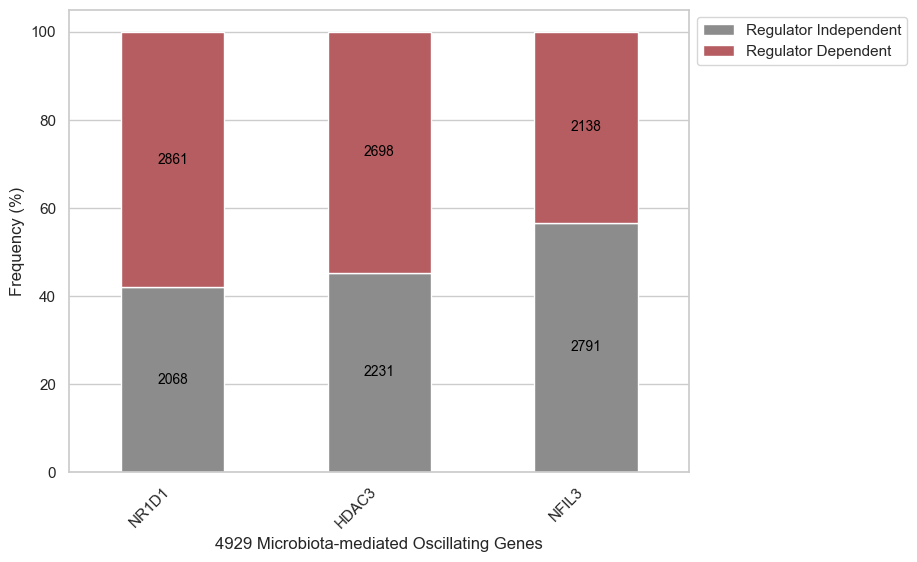

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_theme(style="whitegrid")

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Define bar width (smaller values make bars thinner)
bar_width = 0.5  

color_ind = sns.color_palette()[7]
color_dep = sns.color_palette()[3]

# Create stacked bar plot using Seaborn
bottoms = regs_perc['regulator independent'].values
sns.barplot(x=regs_perc.index, y=regs_perc['regulator independent'], color=color_ind, label='Regulator Independent', ax=ax, width=bar_width)
sns.barplot(x=regs_perc.index, y=regs_perc['regulator dependent'], bottom=bottoms, color=color_dep, label='Regulator Dependent', ax=ax, width=bar_width)

# Set labels and title
ax.set_ylabel('Frequency (%)')
ax.set_xlabel('4929 Microbiota-mediated Oscillating Genes')

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add labels to each section of the bars
for i, (independent, dependent) in enumerate(zip(regs_perc['regulator independent'], regs_perc['regulator dependent'])):
    ax.text(i, independent / 2, str(regs.iloc[i, 0]), ha='center', va='center', color='black', fontsize=10)  # Independent label
    ax.text(i, independent + (dependent / 2), str(regs.iloc[i, 1]), ha='center', va='center', color='black', fontsize=10)  # Dependent label

# Rotate x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [49]:
sns.color_palette()[8]
sns.color_palette()[9]

(0.8, 0.7254901960784313, 0.4549019607843137)